In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from pandas.api.types import CategoricalDtype

# pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(os. getcwd()):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\Users\Jeswin\Documents\Github\House prices - Advanced regression techniques\data_description.txt
C:\Users\Jeswin\Documents\Github\House prices - Advanced regression techniques\House prices EDA .ipynb
C:\Users\Jeswin\Documents\Github\House prices - Advanced regression techniques\sample_submission.csv
C:\Users\Jeswin\Documents\Github\House prices - Advanced regression techniques\test.csv
C:\Users\Jeswin\Documents\Github\House prices - Advanced regression techniques\train.csv
C:\Users\Jeswin\Documents\Github\House prices - Advanced regression techniques\.ipynb_checkpoints\House prices EDA -checkpoint.ipynb


## Loading Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)

Training data shape:  (1460, 81)
Testing data shape:  (1459, 80)


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The target variable __SalePrice__ has nor null value.

## Data Wrangling
### 1. Determining data types of columns

Number of numerical, boolean and categorical features

In [5]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
boolean_dtypes = ['bool']
print("Number of numerical data types: ", len(train.select_dtypes(include = numeric_dtypes).columns))
train.select_dtypes(include = numeric_dtypes).columns

Number of numerical data types:  38


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
print("Number of boolean data types: ", len(train.select_dtypes(include = 'bool').columns))

Number of boolean data types:  0


In [7]:
print("Number of object data types: ", len(train.select_dtypes(include = 'object').columns))

Number of object data types:  43


In [8]:
numerical_columns = list(train.select_dtypes(include = numeric_dtypes).columns)
string_columns = list(train.select_dtypes(include = 'object').columns)

### 2. Dealing with NA values

Combine the train and test data into a single dataset this make it easier to analyze the train and test data for NULL values.

In [9]:
dataset = pd.concat([train.drop(columns = ['SalePrice']), test], ignore_index = True)
dataset.shape

(2919, 80)

To get the names of columns with null values, null value count, percentage and column data type.

In [10]:
ser_cols_and_null_values = dataset.isnull().sum()[dataset.isnull().sum() != 0].sort_values(ascending=False)
percent = (ser_cols_and_null_values/dataset.shape[0])*100
col_type = pd.Series(['Numerial' if col in numerical_columns else 'String'  for col in ser_cols_and_null_values.index])
col_type.index = ser_cols_and_null_values.index
null_column_percentage = pd.concat([ser_cols_and_null_values, percent, col_type], axis = 1)
null_column_percentage.columns = ['Null values count', 'Null values %ge', 'Column Data type']
null_column_percentage

,Null values count,Null values %ge,Column Data type
PoolQC,2909,99.657417,String
MiscFeature,2814,96.402878,String
Alley,2721,93.216855,String
Fence,2348,80.438506,String
FireplaceQu,1420,48.646797,String
LotFrontage,486,16.649538,Numerial
GarageFinish,159,5.447071,String
GarageYrBlt,159,5.447071,Numerial
GarageQual,159,5.447071,String
GarageCond,159,5.447071,String


Numerical columns with null values

In [11]:
num_cols_with_null_values = list(ser_cols_and_null_values.index[ser_cols_and_null_values.index.isin(numerical_columns)])
num_cols_with_null_values

['LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF']

Finding the boxplot of numerical columns with null values

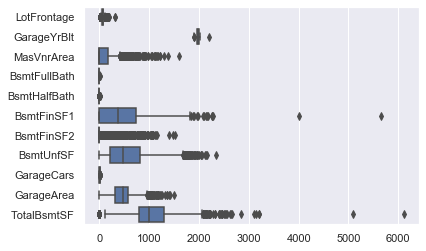

In [12]:
sns.boxplot(data = dataset.loc[:,num_cols_with_null_values], orient = 'h', color='b');

In [13]:
dataset.loc[:,num_cols_with_null_values].describe()

,LotFrontage,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,GarageCars,GarageArea,TotalBsmtSF
count,2433.000000,2760.000000,2896.000000,2917.000000,2917.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000
mean,69.305795,1978.113406,102.201312,0.429894,0.061364,441.423235,49.582248,560.772104,1.766621,472.874572,1051.777587
std,23.344905,25.574285,179.334253,0.524736,0.245687,455.610826,169.205611,439.543659,0.761624,215.394815,440.766258
min,21.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,220.000000,1.000000,320.000000,793.000000
50%,68.000000,1979.000000,0.000000,0.000000,0.000000,368.500000,0.000000,467.000000,2.000000,480.000000,989.500000
75%,80.000000,2002.000000,164.000000,1.000000,0.000000,733.000000,0.000000,805.500000,2.000000,576.000000,1302.000000
max,313.000000,2207.000000,1600.000000,3.000000,2.000000,5644.000000,1526.000000,2336.000000,5.000000,1488.000000,6110.000000


Filling the null values of  numerical columns with the median values

In [14]:
for col in num_cols_with_null_values:
    dataset[col] = dataset[col].fillna(dataset[col].median()) 

String columns with null values

In [15]:
string_cols_with_null_values = list(ser_cols_and_null_values.index[ser_cols_and_null_values.index.isin(string_columns)])

NA implies __None__ in the following columns as per data description i.e., they are valid values here and denote unavailability so replace NA by None in the following columns: 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType','GarageFinish',  'GarageQual','GarageCond','BsmtFinType2', 'BsmtExposure','BsmtFinType1',BsmtCond','BsmtQual', 'MasVnrType'.

In [16]:
cols_with_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual',
                  'GarageCond','BsmtFinType2', 'BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']
for col in cols_with_none:
    dataset[col] = dataset[col].fillna('None')

Columns whose NA values will be replaced by the term with the maximum frequency in that particular column.

'MSZoning','Utilities', 'Functional', 'Exterior2nd', 'Exterior1st','SaleType', 'Electrical','KitchenQual'

In [17]:
cols_with_req_null = ['MSZoning','Utilities', 'Functional', 'Exterior2nd', 'Exterior1st','SaleType', 'Electrical',
                      'KitchenQual', 'MasVnrType']
for col in cols_with_req_null:
    print(col)
    print(dataset[col].value_counts(dropna = False))
    print('-'*50)

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64
--------------------------------------------------
Utilities
AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------
Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64
--------------------------------------------------
Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64
--------------------------------------------------
Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace

Replacing the null values in the string column with the term having maximum frequency in that column.

In [18]:
cols_with_req_null = ['MSZoning','Utilities', 'Functional', 'Exterior2nd', 'Exterior1st','SaleType', 'Electrical',
                      'KitchenQual', 'MasVnrType']
for col in cols_with_req_null:
    dataset[col] = dataset[col].value_counts(dropna = False).index[0]

Check if any column is having missing values in dataset:

In [19]:
dataset.isnull().sum()[dataset.isnull().sum() != 0]

Series([], dtype: int64)

### 3. Converting the data types of columns based on data description

In [20]:
# MSSubClass is in numerical converting it to string-categorical type
dataset['MSSubClass'] = dataset['MSSubClass'].astype(str)
# dataset['MSSubClass'] = dataset['MSSubClass'].astype('category')

In [38]:
# Converting the ordered categorical type OverallQual, OverallCond
# from pandas.api.types import CategoricalDtype
temp_cols = ['OverallQual', 'OverallCond']
for col in temp_cols:
    dataset[col] = dataset[col].astype(str)
#     cat_type = CategoricalDtype(categories=[str(i) for i in range(1,11)], ordered=True)
#     dataset[col] = dataset[col].astype(cat_type)

In [22]:
# Converting to the ordered categorical type
# for col in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','FireplaceQu', 
#             'GarageQual', 'GarageCond', 'PoolQC']:
#     cat_type = CategoricalDtype(categories = ['Po', 'Fa','TA', 'Gd', 'Ex'], ordered = True)
#     dataset[col] = dataset[col].astype(cat_type)

In [23]:
# Converting to the ordered categorical type 
# cat_type = CategoricalDtype(categories=['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'])
# dataset['Fence'] = dataset['Fence'].astype(cat_type)

In [24]:
# for col in ['BsmtFinType1', 'BsmtFinType2' ]:
#     cat_type = CategoricalDtype(categories=['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])
#     dataset[col] = dataset[col].astype(cat_type)

In [27]:
del(string_cols_with_null_values, boolean_dtypes,numerical_columns,string_columns,
   cols_with_req_null, cols_with_none, num_cols_with_null_values, ser_cols_and_null_values, null_column_percentage)

NameError: name 'string_cols_with_null_values' is not defined

splitting the data back to train and test set

In [39]:
X_train = pd.concat([dataset.iloc[0:train.shape[0],:], train['SalePrice']], axis = 1)
test = dataset.iloc[train.shape[0]:,:]
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (1460, 81)
Testing data shape:  (1459, 80)


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   object 
 18  OverallC

## EDA


### The target variable : Distribution of SalePrice

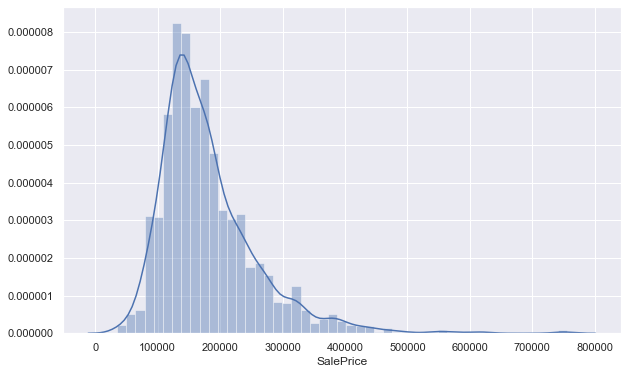

In [45]:
plt.figure(figsize=(10,6));
sns.distplot(X_train['SalePrice']);

The target variable SalePrice is not normally distributed. This can reduce the performance of the ML regression models because some assume normal distribution. see [sklearn info on preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)
Therfore we make a log transformation, the resulting distribution looks much better.

In [1]:
# Skew and kurt
print("Skewness: ", X_train['SalePrice'].skew())
print("Kurtosis: ", X_train['SalePrice'].kurt())

SyntaxError: EOL while scanning string literal (<ipython-input-1-ca261dd324d6>, line 2)

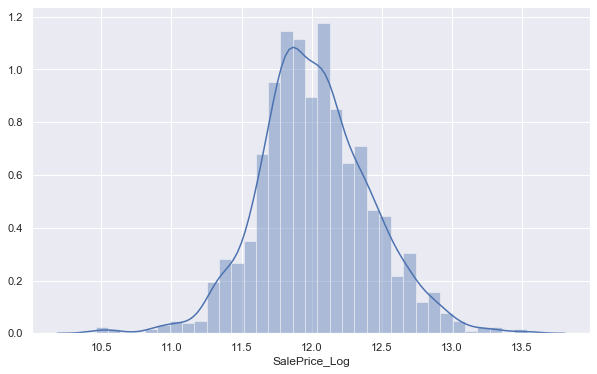

In [47]:
X_train['SalePrice_Log'] = np.log(X_train['SalePrice'])
plt.figure(figsize=(10,6));
sns.distplot(X_train['SalePrice_Log']);

In [48]:
# Skew and kurt of the log of SalePrice
print("Skewness: ", X_train['SalePrice_Log'].skew())
print("Kurtosis: ", X_train['SalePrice_Log'].kurt())

Skewness:  0.12133506220520406
Kurtosis:  0.8095319958036296


In [49]:
numerical_columns = list(X_train.select_dtypes(include = numeric_dtypes).columns)
string_columns = list(X_train.select_dtypes(include = ['category','object']).columns)

In [50]:
len(numerical_columns)

36

In [51]:
numerical_columns

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'SalePrice_Log']

Plots of relation to target for all numerical features